In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import panel as pn

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.pipeline import make_pipeline


In [2]:
# Import the dataset
df = pd.read_csv('train.csv', index_col=0) 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
y = df['Survived'] 
X = df.drop(columns= ['Survived'])

In [121]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

# Feature engineering start

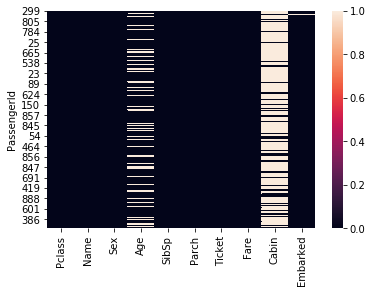

In [5]:
sns.heatmap(X_train.isna())

## Feature Engineering pipeline for numerical AND categorical features

In [122]:
# Model prediction 0 (7 features) LogisticRegression
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('my_bins', KBinsDiscretizer(n_bins = 5, encode = 'onehot', strategy = 'quantile'))
    ])
#('scaler', StandardScaler())
categorical_features = ['Embarked' , 'Sex', 'Pclass', 'SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
p = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

p.fit(X_train, y_train)
p.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


0.8143712574850299

In [123]:
# Model prediction 1 (only numerical)
# taken out'Embarked' , 'Sex', 'Pclass','SibSp', 'Parch'

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('my_bins', KBinsDiscretizer(n_bins = 5, encode = 'onehot', strategy = 'quantile'))
    ])
#('scaler', StandardScaler())
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
p1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

p1.fit(X_train, y_train)
p1.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


0.6601796407185628

In [167]:
# Model prediction 2 (7 Features) RandomForest
# taken out 

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('my_bins', KBinsDiscretizer(n_bins = 5, encode = 'onehot', strategy = 'quantile'))
    ])
#('scaler', StandardScaler())
categorical_features = ['Embarked' , 'Sex', 'Pclass', 'SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
p2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

p2.fit(X_train, y_train)
p2.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


0.8877245508982036

In [168]:
# Model prediction 3  (7 features) DecisionTree
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('my_bins', KBinsDiscretizer(n_bins = 5, encode = 'onehot', strategy = 'quantile'))
    ])
#('scaler', StandardScaler())
categorical_features = ['Embarked' , 'Sex', 'Pclass','SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
p3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

p3.fit(X_train, y_train)
p3.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


0.8877245508982036

In [185]:
print('LogReg, 7 Feat score: ' + str(p.score(X_train, y_train).round(3)))
print('LogReg, Num Feat score: ' + str(p1.score(X_train, y_train).round(3)))
print('RandomForest score: ' + str(p2.score(X_train, y_train).round(3)))
print('DecisionTree score: ' + str(p3.score(X_train, y_train).round(3)))

LogReg, 7 Feat score: 0.814
LogReg, Num Feat score: 0.66
RandomForest score: 0.888
DecisionTree score: 0.888


# graphics

Text(0.5, 1.0, 'RandomForest')

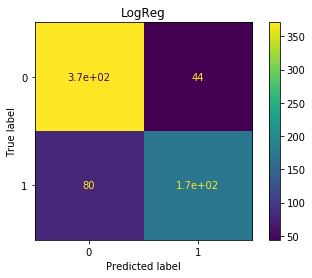

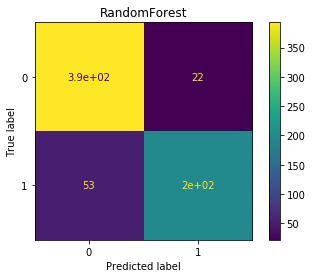

In [126]:
plot_confusion_matrix(p, X_train, y_train)
plt.title('LogReg')
plot_confusion_matrix(p2, X_train, y_train)
plt.title('RandomForest')

In [116]:
len(y_pred_prob1)

223

Text(0, 0.5, 'True Positive Rate')

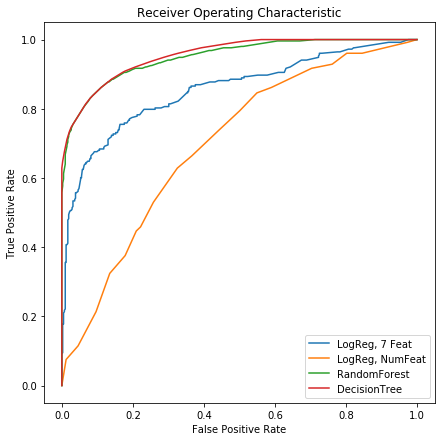

In [174]:
models = [p,p1,p2,p3]
labels = ['LogReg, 7 Feat', 'LogReg, NumFeat', 'RandomForest', 'DecisionTree' ]
plt.figure(figsize=(7,7))
for i in models:
    y_pred_prob = i.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds= roc_curve(y_train, y_pred_prob)
    auc = metrics.roc_auc_score(y_train,i.predict(X_train))
    plt.plot(fpr, tpr)
plt.legend(labels)
plt.title('Receiver Operating Characteristic')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0.5, 1.0, 'Precision Recall Curve')

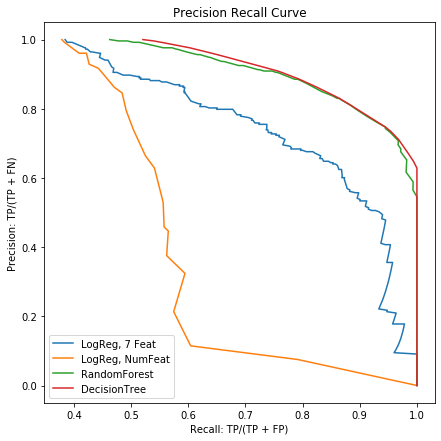

In [166]:
models = [p,p1,p2,p3]
labels = ['LogReg, 7 Feat', 'LogReg, NumFeat', 'RandomForest', 'DecisionTree' ]
plt.figure(figsize=(7,7))
for i in models:
    y_pred_prob = i.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds= precision_recall_curve(y_train, y_pred_prob)
    plt.plot(fpr, tpr)
plt.legend(labels)
plt.xlabel("Recall: TP/(TP + FP)")
plt.ylabel("Precision: TP/(TP + FN)")
plt.title('Precision Recall Curve')

Text(0.5, 1.0, 'RandomForest')

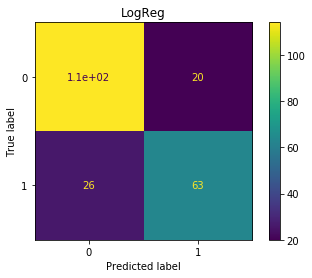

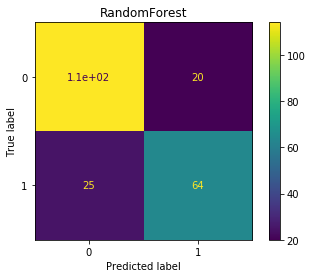

In [177]:
plot_confusion_matrix(p, X_test, y_test)
plt.title('LogReg')
plot_confusion_matrix(p2, X_test, y_test)
plt.title('RandomForest')

In [176]:
p.score(X_test, y_test)

0.7937219730941704

In [175]:
p1.score(X_test, y_test)

0.6771300448430493

In [171]:
p2.score(X_test, y_test)

0.7982062780269058

In [170]:
p3.score(X_test, y_test)

0.7937219730941704